# Economics with [Jupyter Notebooks](http://jupyter.org/)

* Jupyter Notebook is "a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more."

* Open-source, browser-based
* Evolved from  [ipython notebook](http://ipython.org/notebook.html) to leverage huge scientific python ecosystem.
* Now a 'language agnostic' platform so that you can use any of 50+ other kernels including MATLAB, Octave, [Stata](https://github.com/cpbl/pystata), Julia, etc.

* **Open-source, fast evolving, large community:** Widely used in academic and scientific computing community.

* **Ties projects together:** Code, data, documentation, output and analysis all in one place.

* **Encourages reproducible science:**  
   - Easy workflow from exploratory analysis to publish. 
   - Works well with github and other open-source sharing tools.

## Ways to view and run jupyter notebooks

**Jupyter server for interactive computing** Run on a local machine or cloud server to modify code and results on the fly. 

  - On your computer:
     - [Jupyter notebook on your local machine](https://www.continuum.io/downloads).  I recommend using [Anaconda](https://www.continuum.io/downloads) to install Jupyter and scientific python.  A good instalation guide [here](https://lectures.quantecon.org/py/getting_started.html)
     - [nteract](https://nteract.io/). A good one-click install solution for running notebooks.  Provides you with standalone program that installs scientific python and runs jupyter notebooks (not quite full functionality).
  - Jupyter notebooks are big in the data science space. Lots of free cloud server solutions are emerging: 
     - [Microsoft Azure notebooks](https://notebooks.azure.com/): Setup a free account for cloud hosted jupyter notebooks.
     - [Google Colaboratory](https://colab.research.google.com/): Run notebooks stored on your google drive.
     - [Cocalc](https://cocalc.com/): jupyter notebooks, SageMath and other cloud hosted services.
     - [Try Jupyter](https://try.jupyter.org/): another cloud server, but you can't save work at all.

**Static rendering for presentations and publishing.**

* Jupyter notebooks can be rendered in different ways for example as a styled HTML slideshow or page or as a PDF book by using tools and services such as github, nbconvert, [Sphinx](http://www.sphinx-doc.org/) and [Read the Docs](https://readthedocs.org/).  
* **This very notebook** is:
     - hosted on [the Dev-II repository on github](https://github.com/jhconning/Dev-II/blob/master/notebooks/jupyter_notebooks.ipynb) where it is [rendered](https://github.com/jhconning/Dev-II/blob/master/notebooks/jupyter_notebooks.ipynb) in simple HTML (though underlying format is json).
     - viewable in HTML or as javascript slideshow [via nbviewer](http://nbviewer.jupyter.org/github/jhconning/Dev-II/blob/master/notebooks/jupyter_notebooks.ipynb). To then see in slideshow mode click on 'present' icon on top right.
     - Tied together with other documents via Sphinx to create a [website on readthedocs](http://dev-ii-seminar.readthedocs.org/) 
     - Also viewable as a [PDF book on readthedocs](https://media.readthedocs.org/pdf/dev-ii-seminar/latest/dev-ii-seminar.pdf)


## A simple jupyter notebook example:

We can combine text, math, code and graph outputs in one place.  Let's study a simple economics question:

###    Are average incomes per capita converging?


#### Neoclassical growth theory:

* Solow-growth model with Cobb-Douglas technology $f(k)=k^\alpha$.  
* Technology, saving rate $s$, capital depreciation rate $\delta$, population growth rate $n$ and technological change rate $g$ assumed same across countries.


* Steady-state capital per worker to which countries are converging: 
$$k^{*} = (g/s)^\frac{1}{\alpha-1} $$

* Transitional dynamics: 
$$\dot{k}(t) = s k(t)^{t} -(n+g+\delta)k(t)$$

* Diminishing returns to the accumulated factor $k$ implies convergence: 

   - Lower initial capital stock implies lower initial per-capita GDP.
   - Country that starts with lower capital stock and GDP per capita 'catches up' by growing faster.

#### Convergence plots

**Did countries with low levels of income per capita in 1960 grow faster?**

I found a dataset from World Penn Tables [on this website](http://www.reed.edu/economics/course_pages/304_f07/asgns/HW7_empirical.pdf) (original data source [here](http://www.rug.nl/ggdc/docs/pwt90.dta)).  

Let us import useful python libraries for data handling and plots and load the dataset into a pandas dataframe:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from ipywidgets import interact

df = pd.read_stata(".\data\country.dta")

(in the future we will follow best practice and place library imports at the top of our notebooks).

**Scatterplot of log GDP per capita and average growth 1960-2000:**

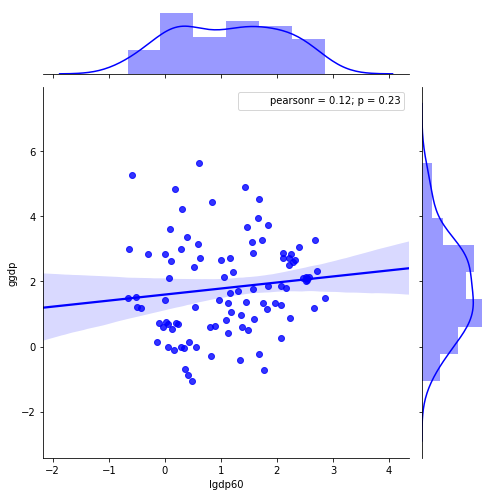

In [2]:
g = sns.jointplot("lgdp60", "ggdp", data=df, kind="reg",
                  color ="b", size=7)

**Same plot but excluding African countries:**

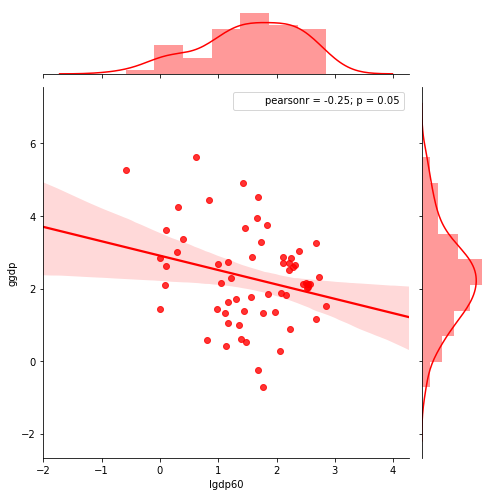

In [3]:
g = sns.jointplot("lgdp60", "ggdp", data=df[df.cont !="Africa"], kind="reg", 
                  color ="r", size=7)

#### Interactive plots

There are ways to make plots like these interactive.  
* On the next slide I use [ipywidgets](https://github.com/ipython/ipywidgets):  When the notebook is run on a jupyter server 'radio buttons' above the plot allow quick re-plotting for selected country regions. 

* Other libraries such as [Bokeh](http://bokeh.pydata.org/) and [Plotly](https://plot.ly/) create plots with embedded javascript code that allow interactive plot elements even on HTML renderings (i.e. in most browsers even if you do not have a jupyter server running).

Here is how do do a **dropdown menu**.  First we write a function to take a 'region' as argument that plots data only for that region (by specifying that filter in the pandas dataframe). We then use interact from the ipywidgets library to switch quickly between regions.

You'll only see this as truly interactive on a live notebook, not in a static HTML rendering of the same notebook.

In [4]:
def jplot(region):
    sns.jointplot("lgdp60", "ggdp", data=df[df.cont == region], 
                  kind="reg", color ="g", size=7)
    plt.show();

In [5]:
interact(jplot, region=list(df.cont.unique()))

<function __main__.jplot>

## More on jupyter notebooks and scientific python

* An excellent introduction to Jupyter notebooks and scientific python for economists written by John Stachurski is at this link: 

[http://quant-econ.net/py/learning_python.html](http://quant-econ.net/py/learning_python.html)
